In [1]:
#Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns


#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list:  ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)


In [ ]:
df_technology = df['job_type_skills'].copy()

#Drop duplicates and NAs
df_technology = df_technology.drop_duplicates()
df_technology=df_technology.dropna()

#combine dictionaries

technology_dict = {}

for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key]+= value #Add value to existing key 
        else:
            technology_dict[key]=value   #add key and value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

  

,technology,skills
0,analyst_tools,"[splunk, excel, sharepoint, spss, word, cognos..."
1,programming,"[python, mongodb, shell, typescript, mongo, oc..."
2,cloud,"[openstack, oracle, azure, aurora, ovh, databr..."
3,libraries,"[numpy, gtx, dplyr, chainer, ggplot2, ionic, t..."
4,other,"[unreal, ansible, git, pulumi, terminal, docke..."
5,databases,"[postgresql, dynamodb, neo4j, firebase, db2, s..."
6,os,"[arch, wsl, kali, fedora, suse, linux, unix, u..."
7,async,"[airtable, workfront, smartsheet, monday.com, ..."
8,webframeworks,"[node, play framework, next.js, blazor, django..."
9,sync,"[slack, zoom, webex, wire, symphony, rocketcha..."


In [26]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills']) 
df_technology=df_technology.explode('skills')


In [42]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us=df_da_us.dropna(subset=['salary_year_avg'])

df_da_us_explode = df_da_us.explode('job_skills')

df_da_us_explode[['salary_year_avg', 'job_skills']].head(5)
df_da_skills=df_da_us_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_da_skills=df_da_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

da_job_count = len(df_da_us)
df_da_skills['skill_percent']=df_da_skills['skill_count']/da_job_count*100
skill_percent=5

df_da_skills_high_demand = df_da_skills[df_da_skills['skill_percent']>skill_percent]

df_da_skills_high_demand=df_da_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')


4 [ 0.92352291 -0.31915375]
5 [-0.29516899  0.54230306]


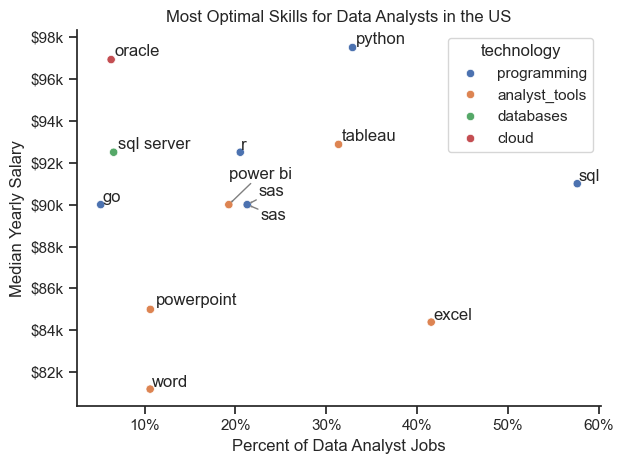

In [41]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_da_skills_high_demand, 
    x='skill_percent', 
    y='median_salary', 
    hue='technology'
    )

sns.despine()
sns.set_theme(style='ticks')

df_da_skills_high_demand=df_da_skills_high_demand.set_index('skills')

texts=[]


for i, txt in enumerate(df_da_skills_high_demand.index):
    texts.append(plt.text(df_da_skills_high_demand['skill_percent'].iloc[i], df_da_skills_high_demand['median_salary'].iloc[i], txt ))
    

adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = "gray", lw=1))



ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:  f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter( decimals=0))

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.tight_layout()



plt.show()

3 [0.2845366  0.00206198]
4 [-0.19815274  0.77626573]


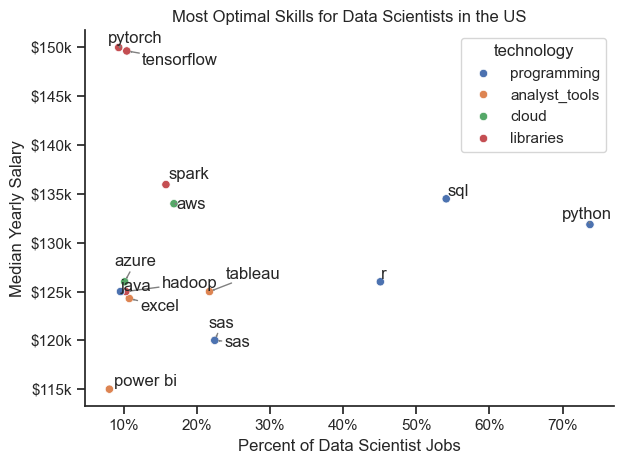

In [46]:
df_ds_us = df[(df['job_title_short']=='Data Scientist') & (df['job_country']=='United States')].copy()
df_ds_us=df_ds_us.dropna(subset=['salary_year_avg'])

df_ds_us_explode = df_ds_us.explode('job_skills')

df_ds_us_explode[['salary_year_avg', 'job_skills']].head(5)
df_ds_skills=df_ds_us_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_ds_skills=df_ds_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

ds_job_count = len(df_ds_us)
df_ds_skills['skill_percent']=df_ds_skills['skill_count']/ds_job_count*100
skill_percent=8

df_ds_skills_high_demand = df_ds_skills[df_ds_skills['skill_percent']>skill_percent]

df_ds_skills_high_demand=df_ds_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_ds_skills_high_demand, 
    x='skill_percent', 
    y='median_salary', 
    hue='technology'
    )

sns.despine()
sns.set_theme(style='ticks')

df_ds_skills_high_demand=df_ds_skills_high_demand.set_index('skills')

texts=[]


for i, txt in enumerate(df_ds_skills_high_demand.index):
    texts.append(plt.text(df_ds_skills_high_demand['skill_percent'].iloc[i], df_ds_skills_high_demand['median_salary'].iloc[i], txt ))
    

adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = "gray", lw=1))



ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:  f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter( decimals=0))

plt.xlabel('Percent of Data Scientist Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Scientists in the US')
plt.tight_layout()



plt.show()

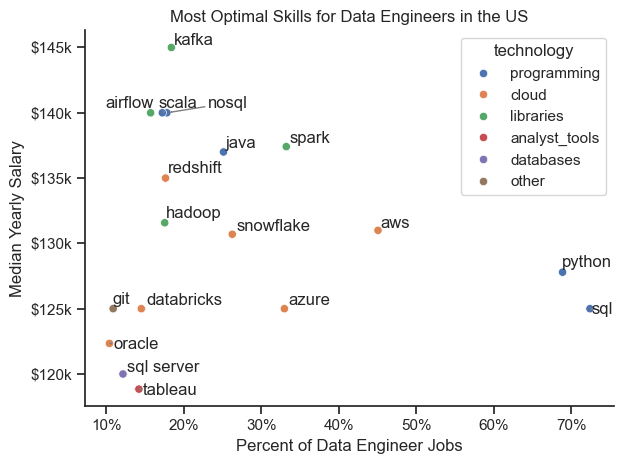

In [48]:
df_de_us = df[(df['job_title_short']=='Data Engineer') & (df['job_country']=='United States')].copy()
df_de_us=df_de_us.dropna(subset=['salary_year_avg'])

df_de_us_explode = df_de_us.explode('job_skills')

df_de_us_explode[['salary_year_avg', 'job_skills']].head(5)
df_de_skills=df_de_us_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_de_skills=df_de_skills.rename(columns={'count':'skill_count', 'median':'median_salary'})

de_job_count = len(df_de_us)
df_de_skills['skill_percent']=df_de_skills['skill_count']/de_job_count*100
skill_percent=10

df_de_skills_high_demand = df_de_skills[df_de_skills['skill_percent']>skill_percent]

df_de_skills_high_demand=df_de_skills_high_demand.merge(df_technology, left_on='job_skills', right_on='skills')

from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(
    data=df_de_skills_high_demand, 
    x='skill_percent', 
    y='median_salary', 
    hue='technology'
    )

sns.despine()
sns.set_theme(style='ticks')

df_de_skills_high_demand=df_de_skills_high_demand.set_index('skills')

texts=[]


for i, txt in enumerate(df_de_skills_high_demand.index):
    texts.append(plt.text(df_de_skills_high_demand['skill_percent'].iloc[i], df_de_skills_high_demand['median_salary'].iloc[i], txt ))
    

adjust_text(texts, arrowprops = dict(arrowstyle = "->", color = "gray", lw=1))



ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:  f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter( decimals=0))

plt.xlabel('Percent of Data Engineer Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Engineers in the US')
plt.tight_layout()



plt.show()

In [53]:
# investigating specialization correlation

import scipy.stats as ss



In [57]:
ss.pearsonr(df_da_skills['skill_percent'], df_da_skills['median_salary'])

PearsonRResult(statistic=np.float64(-0.08394337151788928), pvalue=np.float64(0.27644737064684893))

In [56]:
ss.pearsonr(df_ds_skills['skill_percent'], df_ds_skills['median_salary'])

PearsonRResult(statistic=np.float64(-0.013225799109668186), pvalue=np.float64(0.8597362626067263))

In [58]:
ss.pearsonr(df_de_skills['skill_percent'], df_de_skills['median_salary'])

PearsonRResult(statistic=np.float64(0.03247303961107584), pvalue=np.float64(0.6660832099675298))